CUSTOMER SEGMENTATION ML PROJECT

Step 1 : Import all modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
print("Done!")

Done!


Step 2 : Create Data Frame

In [14]:
df = pd.read_excel(r"D:\Project DS&AIML\Customer-Segmentation\data\Mall Customers.xlsx")

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Education               200 non-null    str  
 4   Marital Status          200 non-null    str  
 5   Annual Income (k$)      200 non-null    int64
 6   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(3)
memory usage: 11.1 KB


In [16]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


Step 3 : Data Cleaning

In [17]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
# No null values are present.

In [19]:
# Drop any duplicate values (If exists)
df = df.drop_duplicates()
df

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [20]:
# Here the column "CustomerID" is not required. It has nothing to do with clustering.
df = df.drop(columns=['CustomerID'])

In [21]:
df

,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,M,19,High School,Married,15,39
1,M,21,Graduate,Single,15,81
2,F,20,Graduate,Married,16,6
3,F,23,High School,Unknown,16,77
4,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...
195,F,35,High School,Married,120,79
196,F,45,High School,Unknown,126,28
197,M,32,Uneducated,Married,126,74
198,M,32,High School,Married,137,18


STEP 4 : Encode Categorical Data

In [22]:
df["Gender"] = df["Gender"].map({"M":0, "F":1})
df.head()

,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,0,19,High School,Married,15,39
1,0,21,Graduate,Single,15,81
2,1,20,Graduate,Married,16,6
3,1,23,High School,Unknown,16,77
4,1,31,Uneducated,Married,17,40


Step 5:EDA visualization


Univariate(Histogram(age))

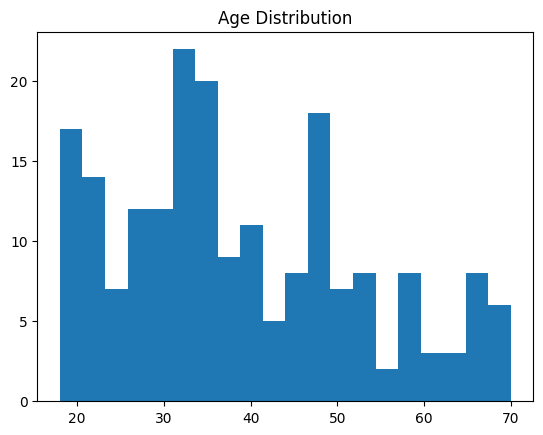

In [23]:
plt.hist(df["Age"], bins=20)
plt.title("Age Distribution")
plt.show()

Bivariate (Scatter(Income vs Spending))

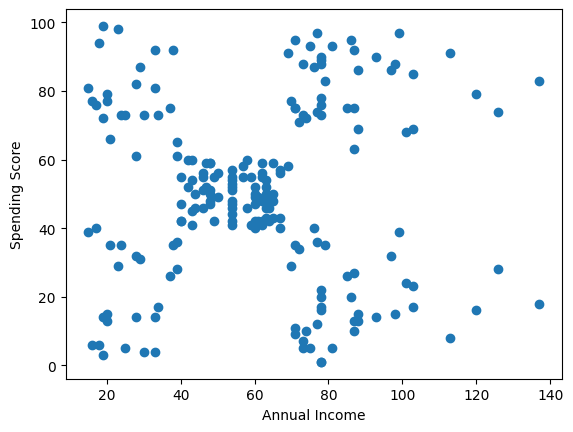

In [24]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Outlier boxplot detection

<Axes: xlabel='Annual Income (k$)'>

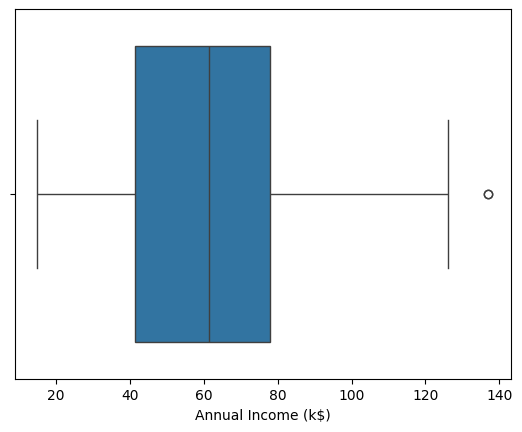

In [25]:
sb.boxplot(x=df["Annual Income (k$)"])

Step 6: Feature Selection

In [26]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

STEP 7 : Feature Scaling

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)